In [1]:
#loading library and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from numpy.random import RandomState

data = pd.read_csv("data/student-mat.csv")


## Exploratory Data Analaysis

In [122]:
#check missing data -> There are no missing data
print(f"Lenght: {len(data)}")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns}")
#data.isnull().any()

Lenght: 395
Shape: (395, 33)
Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Age & Gender

<AxesSubplot:xlabel='finalGrade', ylabel='count'>

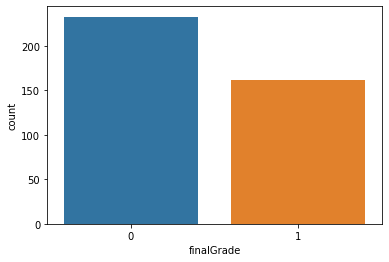

In [2]:
### Marking Final Grade as Categorical Value & Viewing their Count
data['finalGrade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
data['finalGrade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)
sns.countplot(x = 'finalGrade',  data = data)

/Users/juliachu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


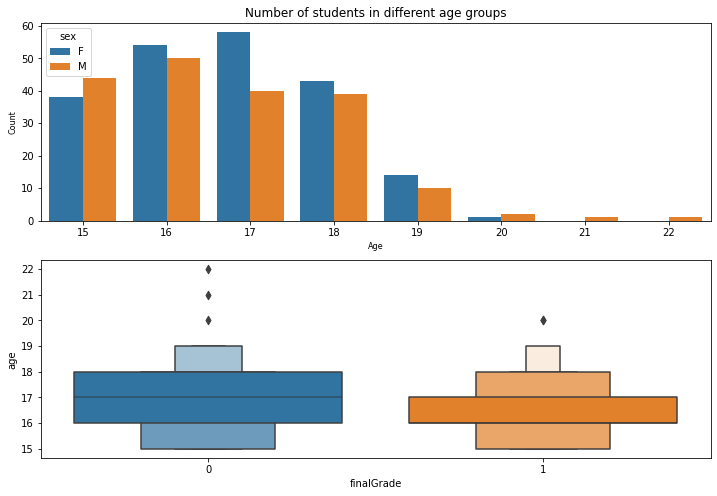

In [9]:
#Age distribution 
#data['age'].unique()
fig, axes = plt.subplots(2, 1, figsize= (12, 8))

age_pl = sns.countplot('age',hue='sex', data=data, ax = axes[0], )
age_pl.axes.set_title('Number of students in different age groups',fontsize=12)
age_pl.set_xlabel("Age",fontsize=8)
age_pl.set_ylabel("Count",fontsize=8)


sns.boxenplot(x = 'finalGrade', y = 'age', data = data, ax = axes[1] )
plt.show()

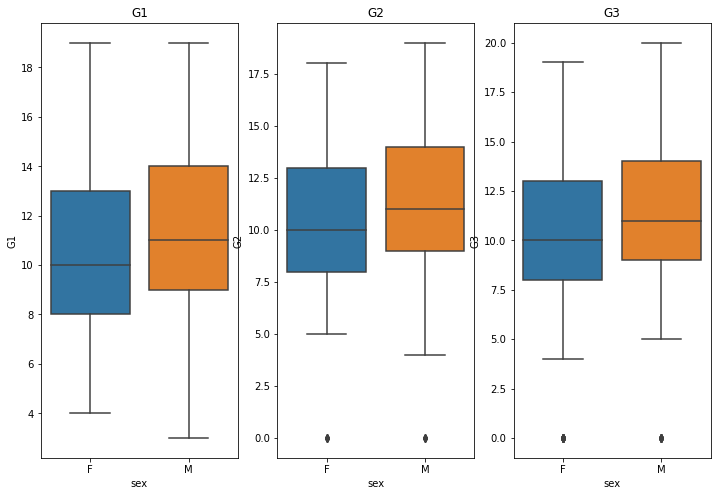

In [5]:
#Whether there's a gender difference in grade distribution in G3
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
ax1 = sns.boxplot(data= data, x= 'sex', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'sex', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

Text(0.5, 0, 'age')

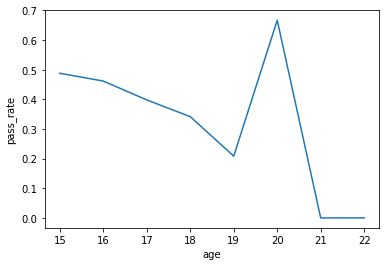

In [15]:
age_data = data.groupby('age')['finalGrade'].agg([('pass_rate','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.age, y= age_data['pass_rate'])
plt.xlabel('age')

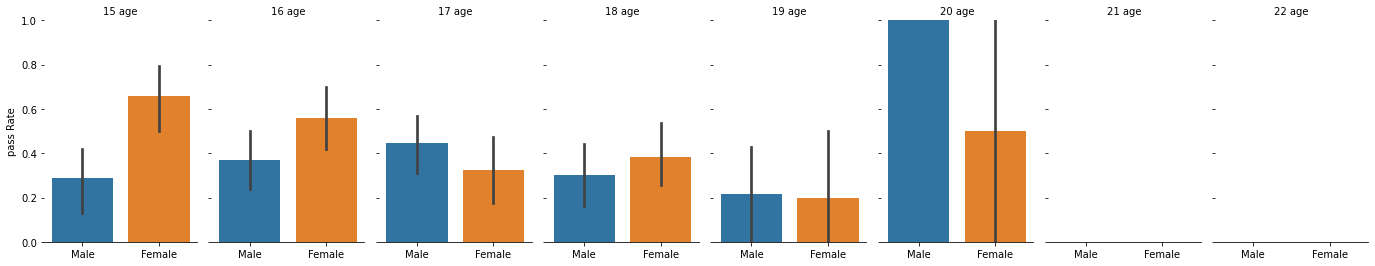

In [126]:
g = sns.catplot(
    data=data, x="sex", y="finalGrade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

### Address: Rural / Urban

Text(0, 0.5, 'Count')

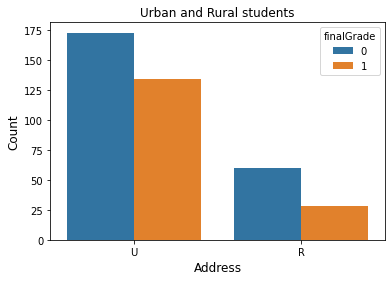

In [127]:
add_plt = sns.countplot(data = data, x ='address', hue = "finalGrade")
add_plt.axes.set_title('Urban and Rural students', fontsize = 12)
add_plt.set_xlabel('Address', fontsize = 12)
add_plt.set_ylabel('Count', fontsize = 12)

#### Parents Education
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Text(0.5, 0.98, 'Educated families result in Potentail higher grades in G1 & G2')

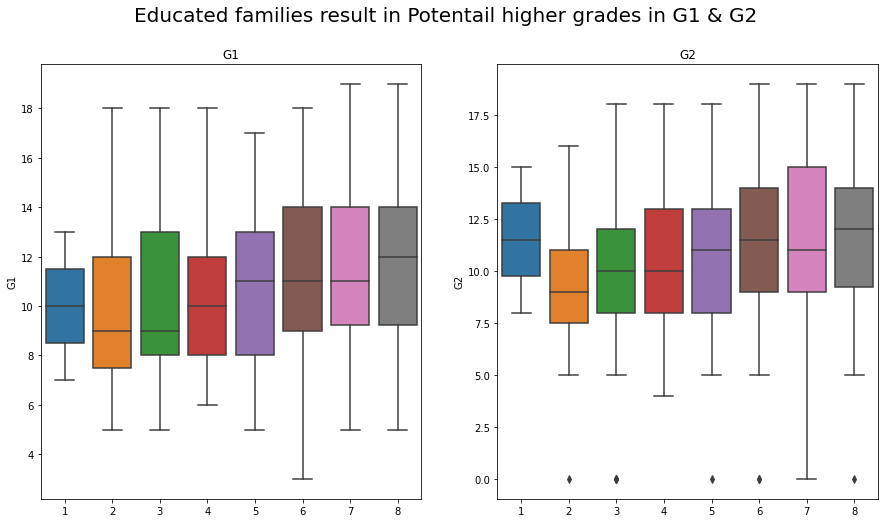

In [128]:
family_ed = data['Fedu'] + data['Medu'] 
# add_plt = sns.countplot(data = data, x =family_ed, hue = "Final Grade")

fig, axes = plt.subplots(1, 2, figsize= (15, 8))
ax1 = sns.boxplot(data= data, x= family_ed, y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= family_ed, y= 'G2', ax= axes[1])
ax2.set_title('G2')

fig.suptitle('Educated families result in Potentail higher grades in G1 & G2', fontsize = 20)


### Train Test Split

In [133]:
#Sample the data into train, test split 
# rng = RandomState()
# train = data.sample(frac=0.7, random_state=rng)
# test = data.loc[~data.index.isin(train.index)]

# display(train.shape)
# display(test.shape)

#Saves the two dataframe to project directory 


# train = train.drop(columns=['G3'])
# test = test.drop(columns=['G3'])
# train['finalGrade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)
# test['finalGrade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)

# train.to_csv("train.csv", index=False)
# test.to_csv("test.csv", index=False)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<AxesSubplot:>

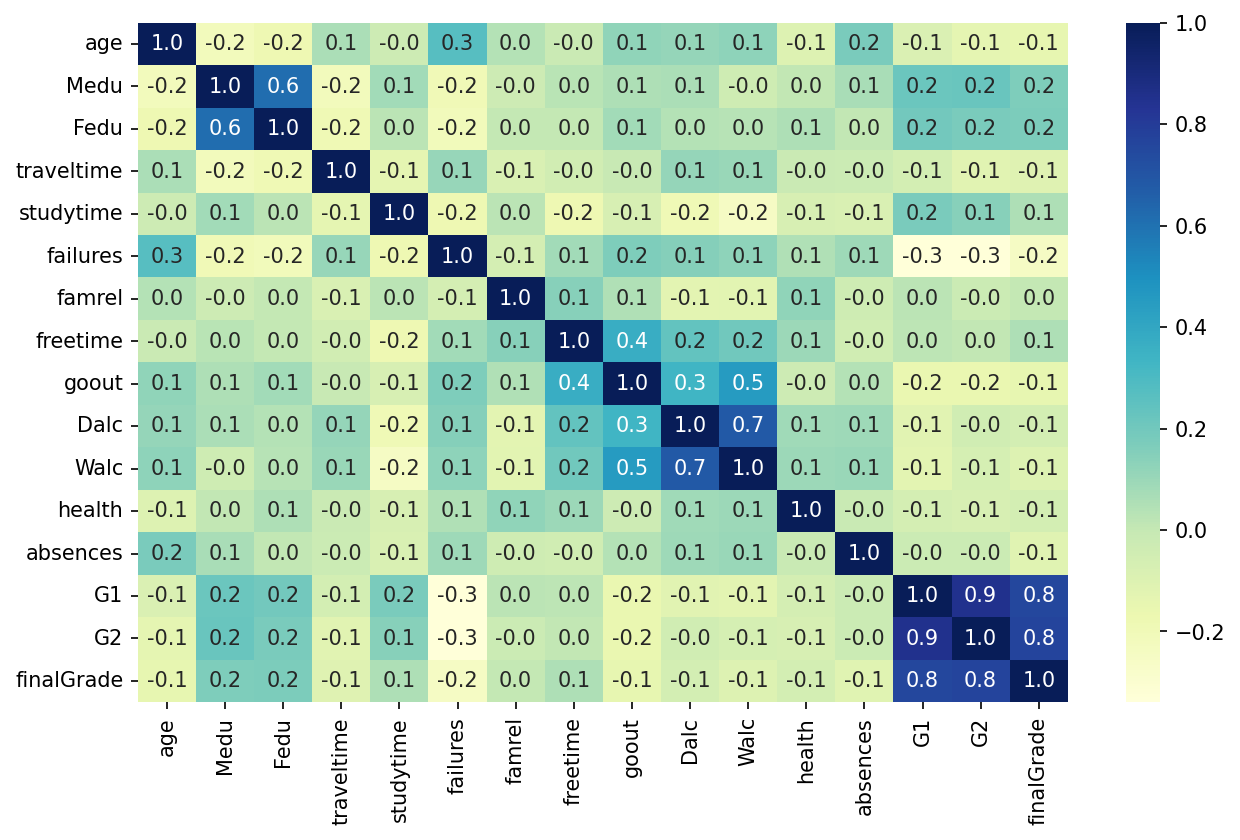

In [130]:
plt.figure(figsize = (10,6), dpi = 150)
sns.heatmap(train.corr(), annot = True, fmt = ".1f", cmap = "YlGnBu")

### Basic Logistic Regression Model

Questions in Mind:
- why does changing G3 to Final Grade binary encoding decreases the correlation coeffcieint of 'failures' with outcome var (if you do heatmap on `data` instead of `train`, `failures` have a correlation coefficient of 0.4)

In [132]:
basic_best_feat = ['G1', "G2", "failures"]
basic_model = sm.logit(formula = 'finalGrade~G1+G2+failures', data = train).fit()
basic_model.summary()

Optimization terminated successfully.
         Current function value: 0.128447
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             finalGrade   No. Observations:                  276
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.8112
Time:                        13:09:16   Log-Likelihood:                -35.451
converged:                       True   LL-Null:                       -187.79
Covariance Type:            nonrobust   LLR p-value:                 9.705e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4382      4.712     -6.036      0.000     -37.673     -19.204
G1             0.2098      0.197      1.066      0.287      -0.176       0.596
G2             2.2443      0.410      5.468      0.000       1.440       3.049
failures       0.8431      0.820      1.028      0.304      -0.764       2.450
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""